In [1]:
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
from collections import Counter
from data_science_toolkit.data_visualization import get_fig_ax, visualize_class_distribution, top_n_tokens_plot_from_counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [59]:
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [3]:
stop_words = set(stopwords.words('english')).union({'', '-', '&'})

In [4]:
file_name = 'trump_tweets_sp500.csv'
stock_tweet = pd.read_csv('./stocks/{}'.format(file_name))
stock_tweet['created_at']= pd.to_datetime(stock_tweet['created_at']) 

In [5]:
stock_tweet.head(10)

,text,created_at,retweet_count,favorite_count,is_retweet,after_dir,1_open_dir,1_close_dir,2_open_dir,2_close_dir,eow_close_dir,sow_open_dir,preprocessed_text
0,Celebrity Apprentice returns to NBC Sunday 3/1...,2010-01-12 18:05:08,20.0,3,False,1,1,1,1,0,0,0,celebrity apprentice returns to nbc sunday 3/1...
1,Trump Tycoon App for iPhone & iPod Touch - It'...,2010-01-15 16:28:02,23.0,20,False,0,0,1,1,0,0,0,trump tycoon app for iphone and ipod touch - i...
2,"from Donald Trump: ""I saw Lady Gaga last night...",2010-01-21 16:58:43,3813.0,3223,False,0,0,0,0,0,0,0,"from donald trump: ""i saw lady gaga last night..."
3,Golf Channel & Donald Trump's World of Golf ho...,2010-01-22 20:51:00,12.0,1,False,1,1,1,1,1,0,0,golf channel and donald trump's world of golf ...
4,Superbowl Sunday is a great American tradition...,2010-02-07 16:54:42,16.0,3,False,0,0,1,1,1,1,1,superbowl sunday is a great american tradition...
5,Donald Trump appearing today on CNN Internatio...,2010-02-10 15:17:56,7.0,1,False,0,0,1,1,1,1,1,donald trump appearing today on cnn internatio...
6,Donald Trump appeared on the final episode of ...,2010-02-11 19:57:36,16.0,3,False,0,1,1,1,1,0,1,donald trump appeared on the final episode of ...
7,From Donald Trump: “I’m so proud of my wife Me...,2010-02-26 21:18:26,25.0,21,False,1,1,1,1,1,1,1,from donald trump: “i’m so proud of my wife me...
8,From Donald Trump: Andrea Bocelli @ Mar-a-Lago...,2010-03-05 14:51:32,7.0,6,False,1,1,1,1,1,1,1,from donald trump: andrea bocelli @ mar-a-lago...
9,The Celebrity Apprentice has a two-hour premie...,2010-03-12 20:30:52,23.0,7,False,0,1,1,1,1,1,1,the celebrity apprentice has a two-hour premie...


In [6]:
since_election = stock_tweet[stock_tweet["created_at"] > datetime(2016, 11, 8)]

# 1.0 Class Distribution

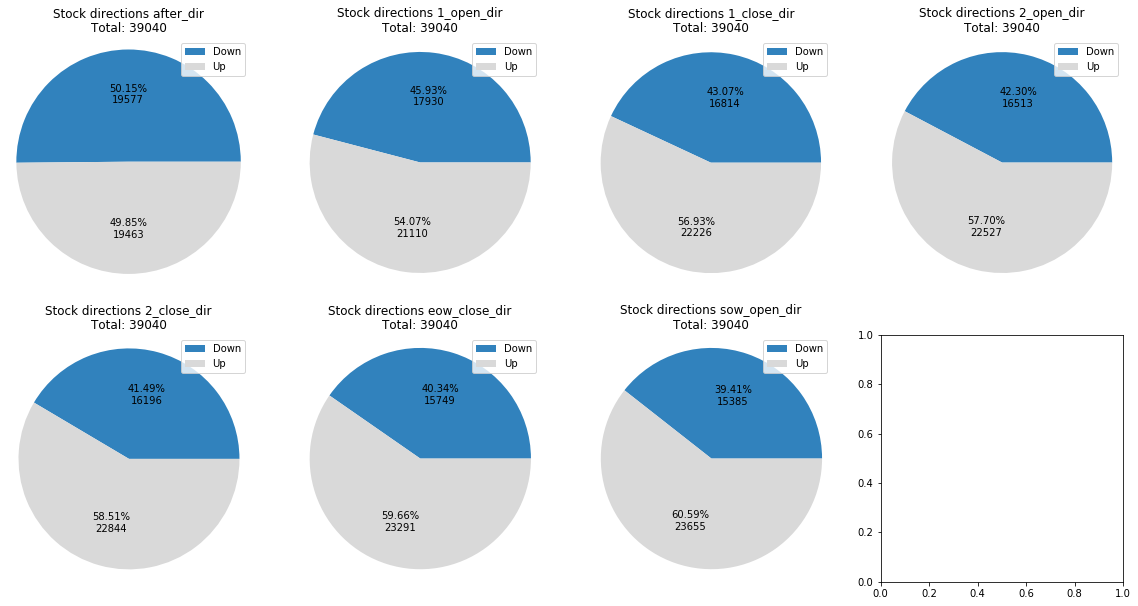

In [7]:
fig, ax = get_fig_ax(2, 4, 5, 5)
ax = visualize_class_distribution(stock_tweet["after_dir"], given_title="Stock directions after_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=0)
ax = visualize_class_distribution(stock_tweet["1_open_dir"], given_title="Stock directions 1_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=1)
ax = visualize_class_distribution(stock_tweet["1_close_dir"], given_title="Stock directions 1_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=2)
ax = visualize_class_distribution(stock_tweet["2_open_dir"], given_title="Stock directions 2_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=3)
ax = visualize_class_distribution(stock_tweet["2_close_dir"], given_title="Stock directions 2_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=0)
ax = visualize_class_distribution(stock_tweet["eow_close_dir"], given_title="Stock directions eow_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=1)
ax = visualize_class_distribution(stock_tweet["sow_open_dir"], given_title="Stock directions sow_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=2)

## 1.1 Class Distribution since Election

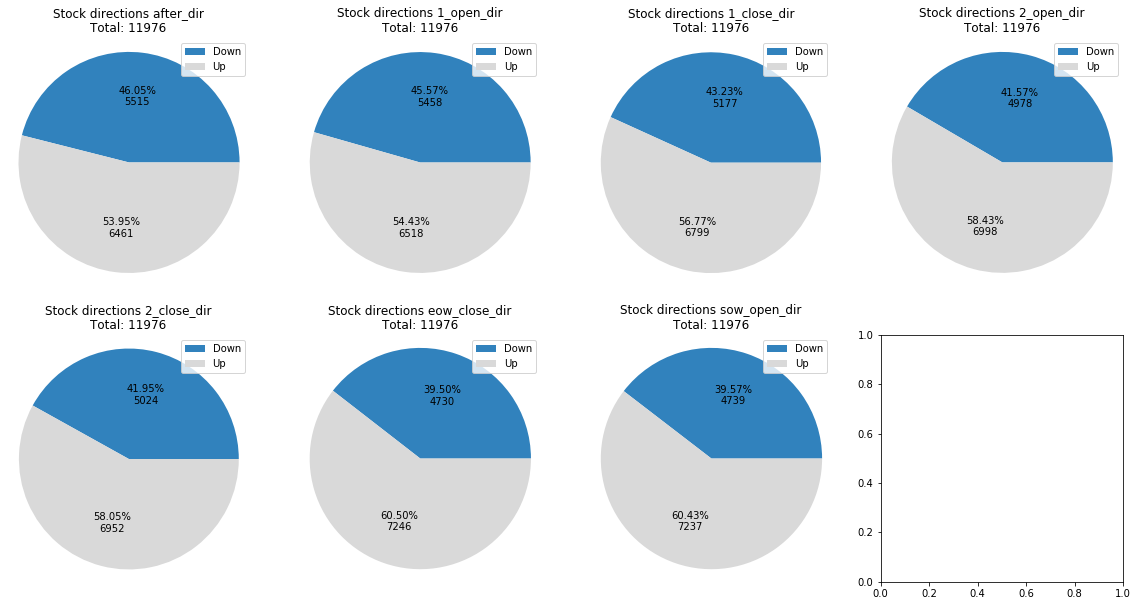

In [8]:
fig, ax = get_fig_ax(2, 4, 5, 5)
ax = visualize_class_distribution(since_election["after_dir"], given_title="Stock directions after_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=0)
ax = visualize_class_distribution(since_election["1_open_dir"], given_title="Stock directions 1_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=1)
ax = visualize_class_distribution(since_election["1_close_dir"], given_title="Stock directions 1_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=2)
ax = visualize_class_distribution(since_election["2_open_dir"], given_title="Stock directions 2_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=3)
ax = visualize_class_distribution(since_election["2_close_dir"], given_title="Stock directions 2_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=0)
ax = visualize_class_distribution(since_election["eow_close_dir"], given_title="Stock directions eow_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=1)
ax = visualize_class_distribution(since_election["sow_open_dir"], given_title="Stock directions sow_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=2)

# 2.0 Most Common Words

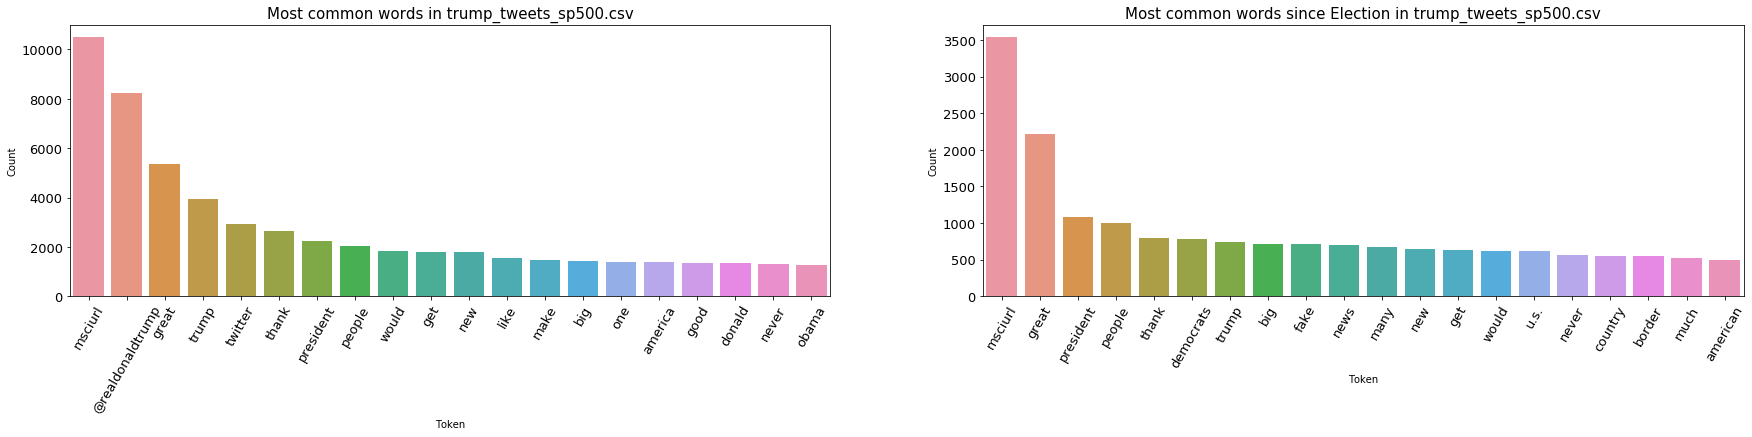

In [9]:
fig, ax = get_fig_ax(1, 2, 15, 5)
ax = top_n_tokens_plot_from_counter(Counter([x for x in ' '.join(stock_tweet["preprocessed_text"].tolist()).split(" ") if x not in stop_words]), 20, ax, 0, 0, "Most common words in {}".format(file_name))
ax = top_n_tokens_plot_from_counter(Counter([x for x in ' '.join(since_election["preprocessed_text"].tolist()).split(" ") if x not in stop_words]), 20, ax, 0, 1, "Most common words since Election in {}".format(file_name))

## 2.1 Most Common Words (Up/Unchanged vs Down)

In [10]:
up_tweet = stock_tweet[stock_tweet['after_dir'] == 1]
up_since_election = since_election[since_election['after_dir'] == 1]
down_tweet = stock_tweet[stock_tweet['after_dir'] == 0]
down_since_election = since_election[since_election['after_dir'] == 0]

In [11]:
def get_count_no_sw(df):
    return Counter([x for x in ' '.join(df["preprocessed_text"].tolist()).split(" ") if x not in stop_words])

In [12]:
up_not_down = get_count_no_sw(up_tweet) - get_count_no_sw(down_tweet)
up_not_down_since_election = get_count_no_sw(up_since_election) - get_count_no_sw(down_since_election)
down_not_up = get_count_no_sw(down_tweet) - get_count_no_sw(up_tweet)
down_not_up_since_election = get_count_no_sw(down_since_election) - get_count_no_sw(up_since_election)

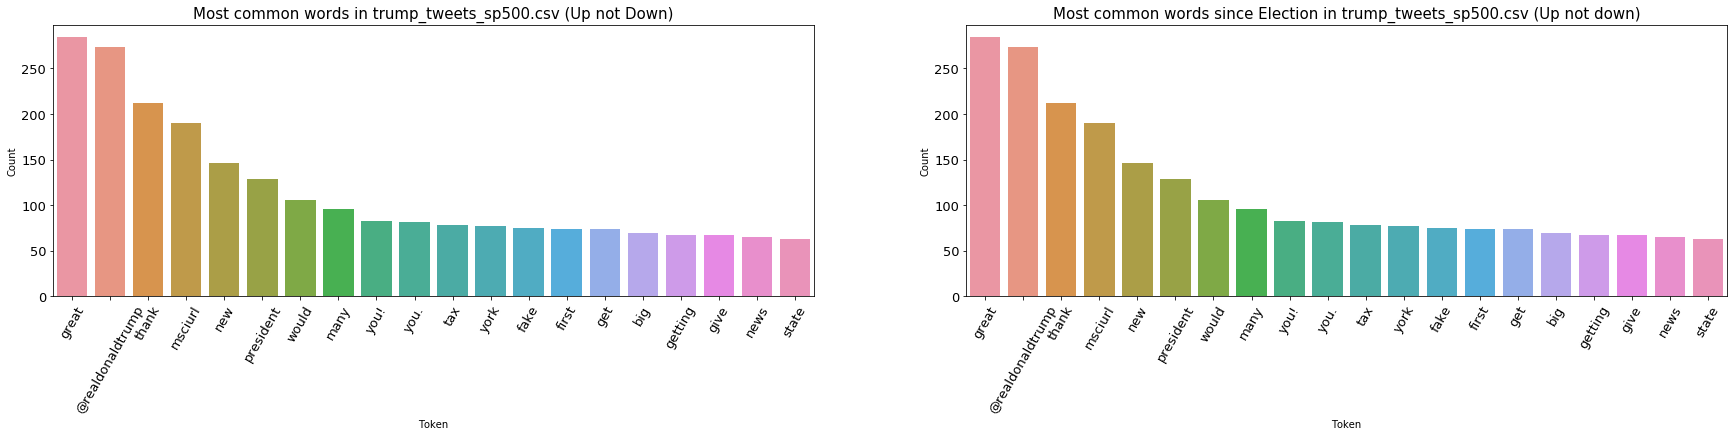

In [13]:
fig, ax = get_fig_ax(1, 2, 15, 5)
ax = top_n_tokens_plot_from_counter(up_not_down, 20, ax, 0, 0, "Most common words in {} (Up not Down)".format(file_name))
ax = top_n_tokens_plot_from_counter(up_not_down, 20, ax, 0, 1, "Most common words since Election in {} (Up not down)".format(file_name))

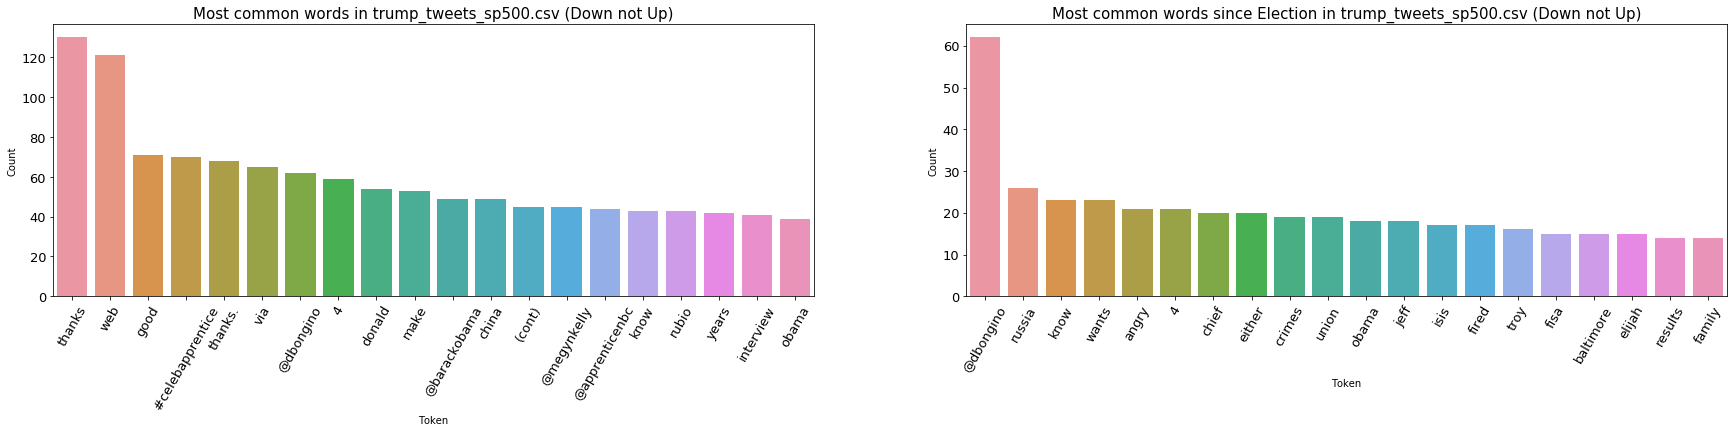

In [14]:
fig, ax = get_fig_ax(1, 2, 15, 5)
ax = top_n_tokens_plot_from_counter(down_not_up, 20, ax, 0, 0, "Most common words in {} (Down not Up)".format(file_name))
ax = top_n_tokens_plot_from_counter(down_not_up_since_election, 20, ax, 0, 1, "Most common words since Election in {} (Down not Up)".format(file_name))

# 3.0 Clustering for Common Topics

Ran out of memory trying to do this for all Trump tweets - I'm only going to do it for tweets since the election.

In [15]:
# Stealing stuff... http://brandonrose.org/clustering
from nltk.stem.snowball import SnowballStemmer
import nltk, re
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
stemmer = SnowballStemmer("english")

In [17]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
#     tokens = text.split(" ")
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
#     stems = [stemmer.stem(t) for t in text.split(" ")]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [18]:
preprocessed_vocab = ' '.join(since_election['preprocessed_text'].tolist())
total_vocab = list(set(tokenize_only(preprocessed_vocab)))
total_vocab_stemmed = [stemmer.stem(t) for t in total_vocab]
vocab_frame = pd.DataFrame({'words': total_vocab}, index = total_vocab_stemmed)
print('there are ', str(vocab_frame.shape[0]), ' items in vocab_frame')

there are  17101  items in vocab_frame


In [19]:
vocab_frame.head(10)

,words
tax,tax
resid,residence
..all,..all
n.korea,n.korea
publish,publisher
propos,proposal
kashmir,kashmir
know,knowing
louderback,louderback
step,steps


In [20]:
vocab_frame.loc[['charact']].values.tolist()

[['characters'], ['character']]

In [21]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000000000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(since_election["preprocessed_text"].tolist()) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/home/michael/anaconda3/envs/testenv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(11976, 286)


In [22]:
terms = tfidf_vectorizer.get_feature_names()

In [23]:
terms[:10]

["'s",
 'act',
 'administr',
 'agre',
 'allow',
 'alreadi',
 'alway',
 'america',
 'america great',
 'american']

dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

Note that with dist it is possible to evaluate the similarity of any two or more synopses.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [120]:
from sklearn.cluster import KMeans
num_clusters=None
inertias = []
# min_inertia = float('inf')
for i in range(2, 60, 8):
    km = KMeans(n_clusters=i, max_iter=10000, n_jobs=6)
    km.fit(tfidf_matrix)
#     if km.inertia_ < min_inertia:
#     num_clusters = i
    inertias.append(km.inertia_)


In [121]:
len(inertias)

8

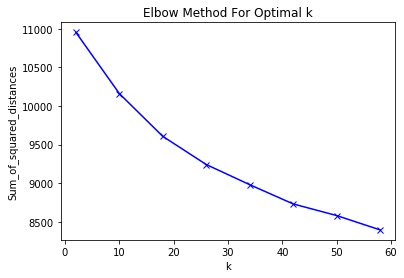

In [122]:
plt.plot(range(2, 60, 8), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [91]:
# Best number of clusters (elbow method): 
km = KMeans(n_clusters=num_clusters, max_iter=10000, n_jobs=4)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [92]:
km.inertia_

10344.32077696408

In [93]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [94]:
since_election['cluster_number'] = clusters

/home/michael/anaconda3/envs/testenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
since_election.head(10)

,text,created_at,retweet_count,favorite_count,is_retweet,after_dir,1_open_dir,1_close_dir,2_open_dir,2_close_dir,eow_close_dir,sow_open_dir,preprocessed_text,cluster_number
27064,Thank you Pennsylvania! Going to New Hampshire now and on to Michigan. Watch PA rally here: https://t.co/d29DLINGst… https://t.co/zcH9crFIKM,2016-11-08 00:08:28,9053.0,29404,False,0,1,1,1,1,1,1,thank you pennsylvania! going to new hampshire now and on to michigan. watch pa rally here: msciurl msciurl,4
27065,Today in Florida I pledged to stand with the people of Cuba and Venezuela in their fight against oppression- cont: https://t.co/8eELqk2wUw,2016-11-08 00:16:15,13829.0,36687,False,0,1,1,1,1,1,1,today in florida i pledged to stand with the people of cuba and venezuela in their fight against oppression- cont: msciurl,0
27066,Big news to share in New Hampshire tonight! Polls looking great! See you soon.,2016-11-08 00:17:57,13264.0,44128,False,0,1,1,1,1,1,1,big news to share in new hampshire tonight! polls looking great! see you soon.,6
27067,Unbelievable evening in New Hampshire - THANK YOU! Flying to Grand Rapids Michigan now. Watch NH rally here:… https://t.co/hP88anrfgk,2016-11-08 03:43:54,9134.0,32240,False,0,1,1,1,1,1,1,unbelievable evening in new hampshire - thank you! flying to grand rapids michigan now. watch nh rally here:… msciurl,4
27068,RT @detroitnews: .@IvankaTrump in Michigan: ‘This is your movement’ https://t.co/0Sa7huoOP1 @realDonaldTrump https://t.co/cMXEqSHuDj,2016-11-08 04:27:18,6982.0,0,True,0,1,1,1,1,1,1,@detroitnews: .@ivankatrump in michigan: ‘this is your movement’ msciurl @realdonaldtrump msciurl,3
27069,RT @DonaldJTrumpJr: Thanks New Hampshire!!! #NH #NewHampshire #MAGA https://t.co/JDgcyJvJpk,2016-11-08 04:29:10,10626.0,0,True,0,1,1,1,1,1,1,@donaldjtrumpjr: thanks new hampshire!!! #nh #newhampshire #maga msciurl,4
27070,Today we are going to win the great state of MICHIGAN and we are going to WIN back the White House! Thank you MI!… https://t.co/onRpEvzHrW,2016-11-08 06:42:36,17323.0,54396,False,0,1,1,1,1,1,1,today we are going to win the great state of michigan and we are going to win back the white house! thank you mi!… msciurl,1
27071,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 11:43:14,344806.0,573283,False,1,1,1,1,1,1,1,today we make america great again!,1
27072,VOTE TODAY! Go to https://t.co/MXrAxYnTjY to find your polling location. We are going to Make America Great Again!… https://t.co/KPQ5EY9VwQ,2016-11-08 16:39:36,29314.0,67452,False,1,1,1,1,1,1,1,vote today! go to msciurl to find your polling location. we are going to make america great again!… msciurl,1
27073,We need your vote. Go to the POLLS! Let's continue this MOVEMENT! Find your poll location: https://t.co/VMUdvi1tx1… https://t.co/zGOx74Ebhw,2016-11-08 18:03:49,23878.0,62105,False,0,1,1,1,1,1,1,we need your vote. go to the polls! let's continue this movement! find your poll location: msciurl msciurl,0


In [96]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % list(itertools.chain(*vocab_frame.loc[terms[ind].split(' ')].values.tolist())), end=',')
    print()

Cluster 0 words: ["'msciurl", 'msciurl'], ['great', 'greats', 'greatness', 'greatly'], ['realdonaldtrump'], ['todays', 'today'], ['honored', 'honorable', 'honoring', 'honor', 'honorably', 'honors'], ["'msciurl", 'msciurl', "'msciurl", 'msciurl'],
Cluster 1 words: ['stated', 'stating', 'state', 'states'], ['unit', 'united', 'units', 'uniting', 'unite'], ['unit', 'united', 'units', 'uniting', 'unite', 'stated', 'stating', 'state', 'states'], ['great', 'greats', 'greatness', 'greatly'], ['americas', 'america'], ['americas', 'america', 'great', 'greats', 'greatness', 'greatly'],
Cluster 2 words: ['news'], ['fake', "'fake", 'fakes'], ['fake', "'fake", 'fakes', 'news'], ['media'], ['news', 'media'], ['fake', "'fake", 'fakes', 'news', 'media'],
Cluster 3 words: ["'msciurl", 'msciurl'], ['great', 'greats', 'greatness', 'greatly'], ["'msciurl", 'msciurl', "'msciurl", 'msciurl'], ['hurricanes', 'hurricane'], ['informing', 'inform', 'informed', 'informants', 'information', 'informant'], ['florida

## 3.1 Class Distribution of Clusters

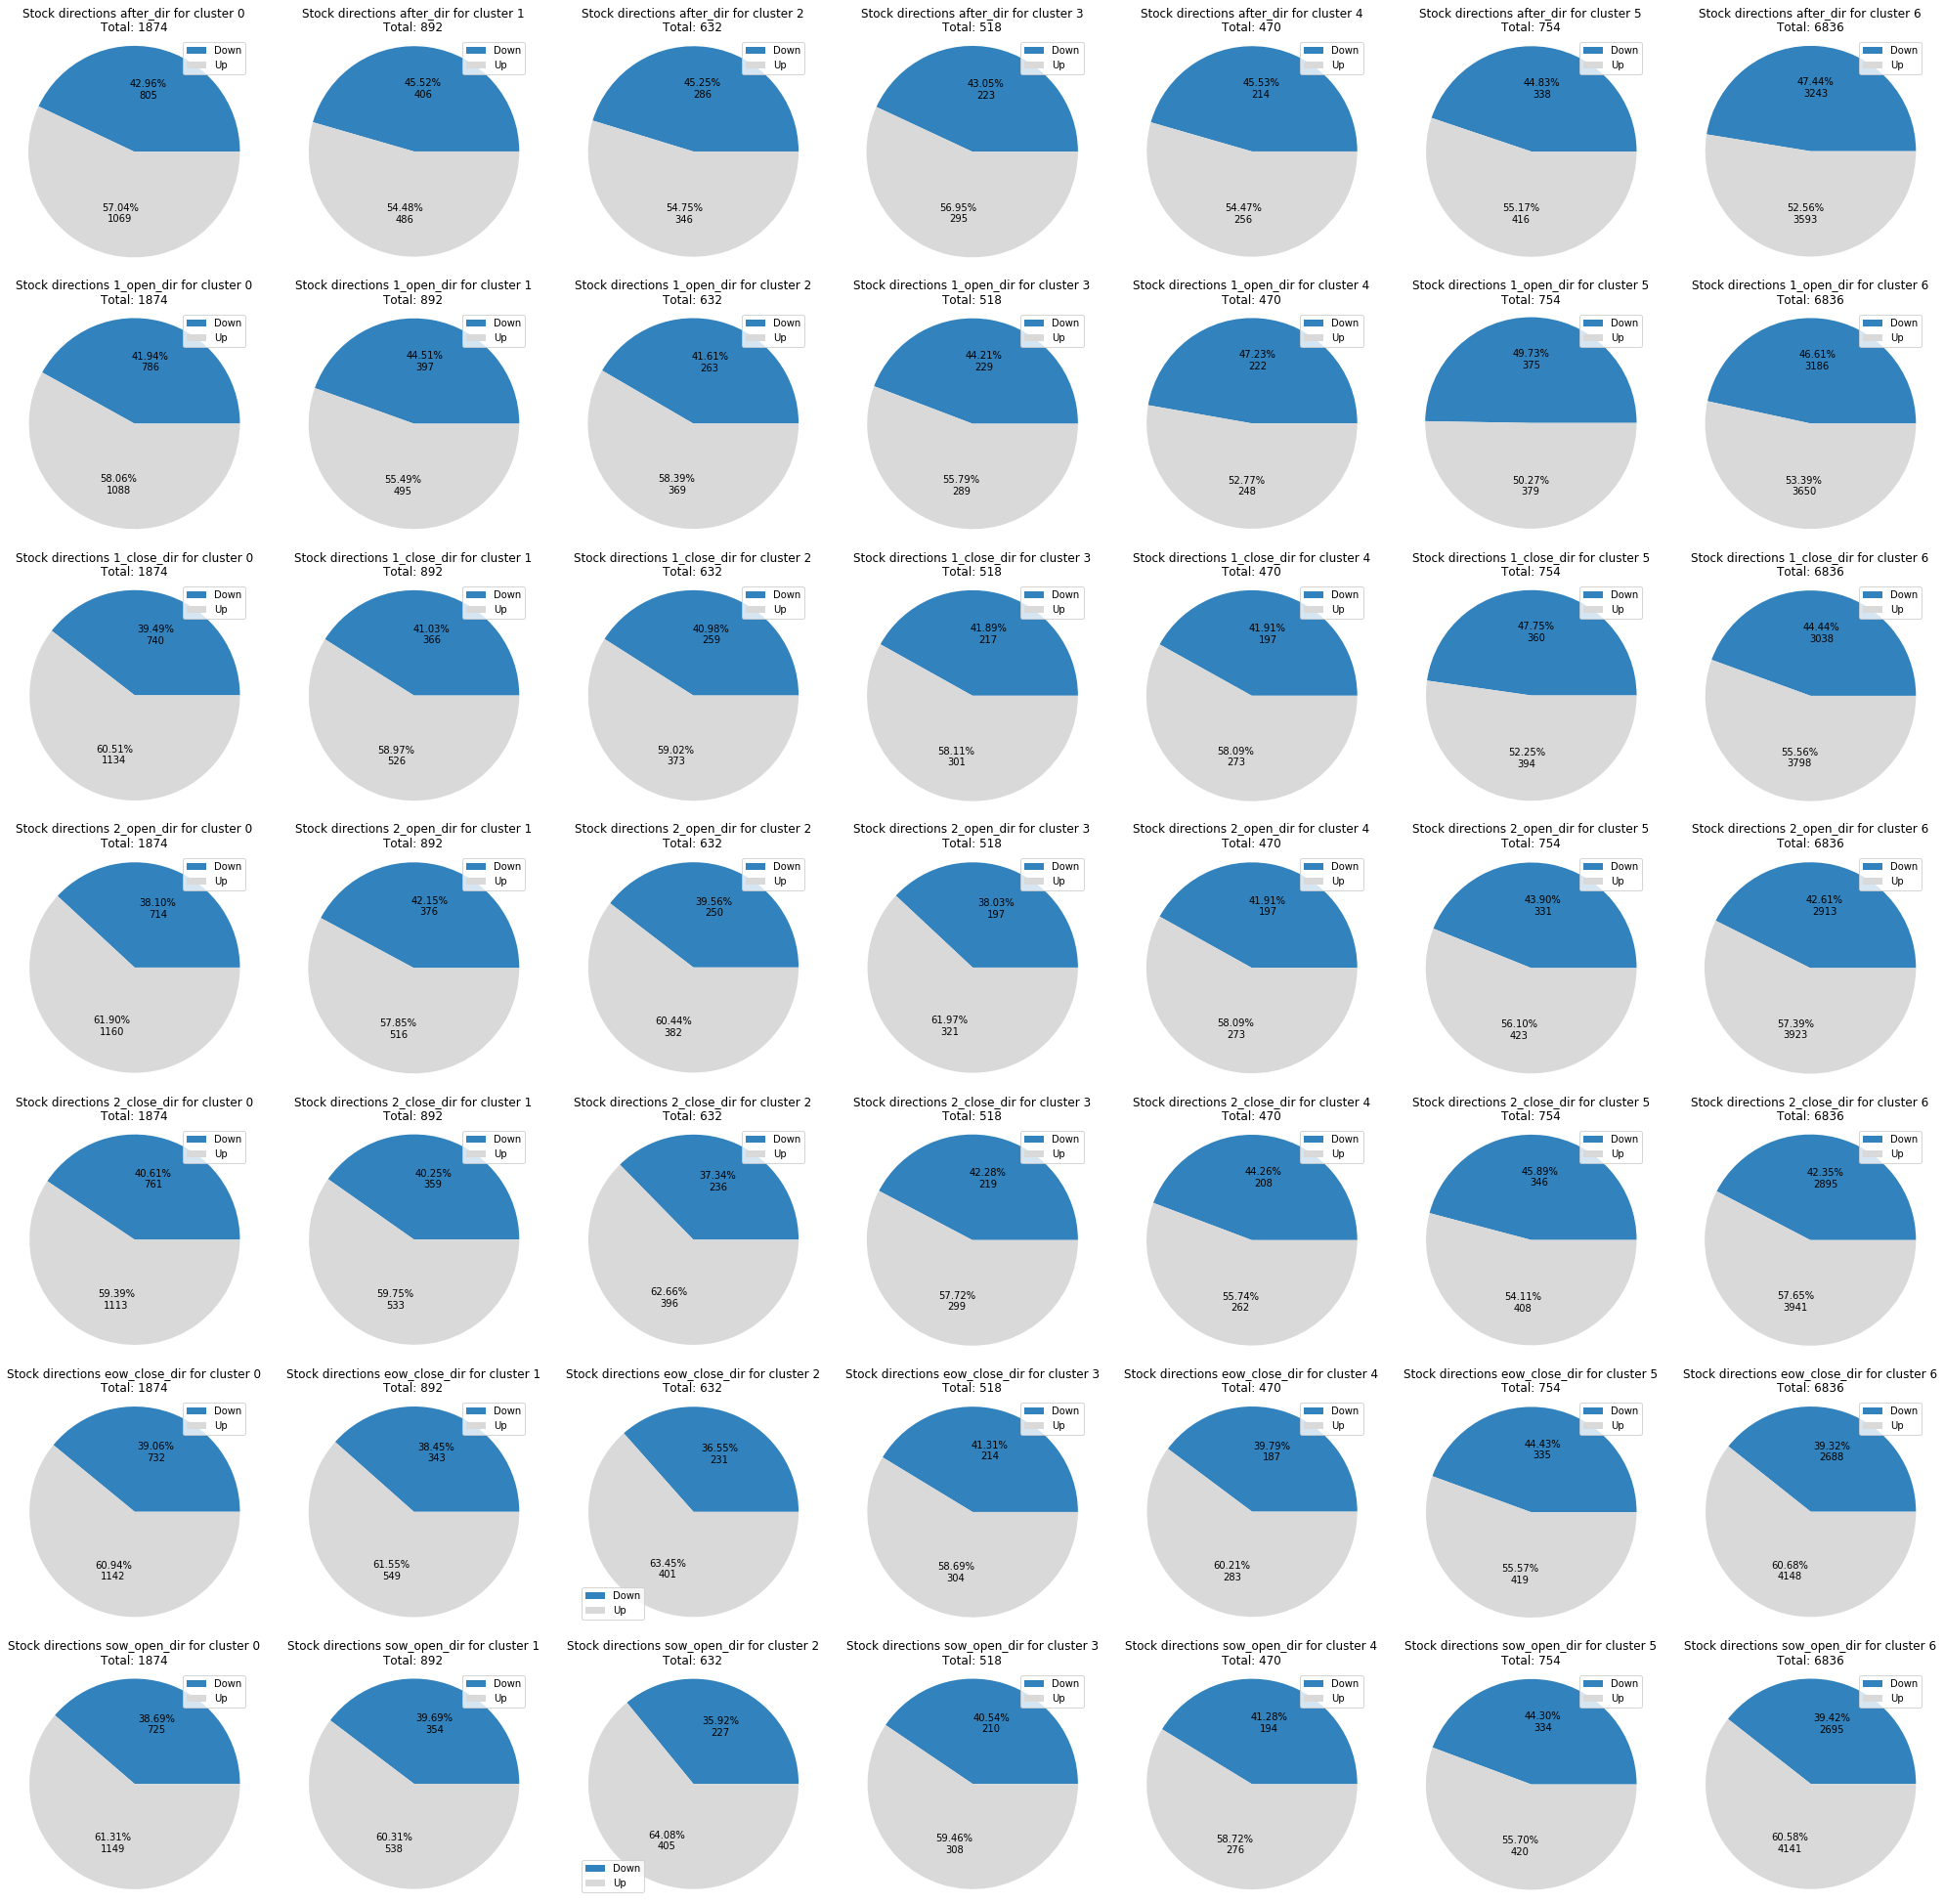

In [97]:
fig, ax = get_fig_ax(7, num_clusters, 5, 5)
for i in range(num_clusters):
    curr_cluster = since_election[since_election['cluster_number'] == i]
    ax = visualize_class_distribution(curr_cluster["after_dir"], given_title="Stock directions after_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["1_open_dir"], given_title="Stock directions 1_open_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["1_close_dir"], given_title="Stock directions 1_close_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=2, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["2_open_dir"], given_title="Stock directions 2_open_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=3, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["2_close_dir"], given_title="Stock directions 2_close_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=4, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["eow_close_dir"], given_title="Stock directions eow_close_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=5, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["sow_open_dir"], given_title="Stock directions sow_open_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=6, col_idx=i)

## 3.2 Examples in Clusters

In [98]:
df = None
for i in range(num_clusters):
    curr_cluster = since_election[since_election['cluster_number'] == i]
    if df is None:
        df = curr_cluster.sample(n=5)
    else:
        df = df.append(curr_cluster.sample(n=5))
    df = df.append(pd.Series(), ignore_index=True)
df[["text", "cluster_number"]]

,text,cluster_number
0,A Great Book by Kimberley Strassel! https://t.co/TOQcUDmnAR,0.0
1,RT @ABC: LATEST: Hurricane Dorian has intensified to a major Category 5 storm threatening the northwestern Bahamas. https://t.co/fjsWABH93…,0.0
2,We have been working hard on this - and it’s only going to get better! https://t.co/MtGjmhMO8B,0.0
3,RT @PressSec: Hispanic Americans enrich our culture and are true examples of the AMERICAN SPIRIT! #HispanicHeritageMonth https://t.co/2oatr…,0.0
4,RT @realDonaldTrump: https://t.co/JDS4zVfyBe,0.0
5,NaN,NaN
6,Georgia Secretary of State Brian Kemp will be a great governor. He has been successful at whatever he has done and has prepared for this very difficult and complex job for many years. He has my Strong Endorsement. His opponent is totally unqualified. Would destroy a great state!,1.0
7,RT @JJmyriteload: @usminority great video,1.0
8,KEEP AMERICA GREAT!,1.0
9,MAKE AMERICA GREAT AGAIN! https://t.co/Y6UPREMY7u https://t.co/6r7wdYDf66,1.0


## 3.3 LDA for Topic Clustering

This section focuses on using Latent Dirichlet Allocation (LDA) to learn yet more about the hidden structure within the top 100 film synopses. LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics. There is quite a good high-level overview of probabilistic topic models by one of the big names in the field, David Blei, available in the Communications of the ACM here. Incidentally, Blei was one of the authors of the seminal paper on LDA.
https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

# 4.0 Distributions

## 4.1.1 Time of Day (Up vs Down)

## 4.1.2 Time of Day since Election (Up vs Down)

## 4.2.1 Day of Week (Up vs Down)

## 4.2.2 Day of Week Since Election (Up vs Down)

## 4.3.1 Num Retweets (Up vs Down)

## 4.3.2 Num Retweets Since Election (Up vs Down)

## 4.4.1 Num Favorites (Up vs Down)

## 4.4.2 Num Favorites Since Election (Up vs Down)

## 4.5.1 Is Retweet (Up vs Down)

## 4.5.2 Is Retweet Since Election (Up vs Down)

# Conclusions